In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFile

# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
from pathlib import Path
from collections import defaultdict

import numpy as np


In [14]:
base_dir = 'Archive/Mushrooms'
path = Path(base_dir)

classes  = [entry.name for entry in path.iterdir() if entry.is_dir()]
classes 

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [23]:
def count_images_in_folders(base_dir):
    # Create a dictionary to store the count of images for each class
    class_counts = defaultdict(int)
    
    # Iterate over each subdirectory (class folder)
    for class_folder in os.listdir(base_dir):
        class_folder_path = os.path.join(base_dir, class_folder)
        
        if os.path.isdir(class_folder_path):  # Ensure it's a directory
            # Count the number of files in the class directory
            num_images = len([f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))])
            class_counts[class_folder] = num_images
    
    return class_counts

class_distribution = count_images_in_folders(base_dir)

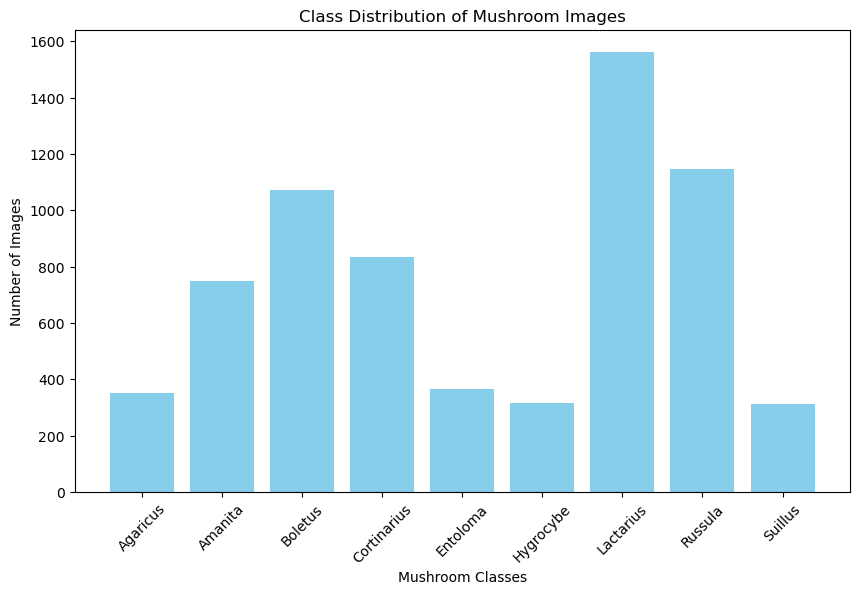

In [75]:
class_distribution = count_images_in_folders(base_dir)

# Convert the class distribution dictionary to lists for plotting
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Mushroom Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Mushroom Images')
plt.xticks(rotation=45)
plt.show()


In [15]:
base_dir = 'Archive/Mushrooms'

def get_class_folders(base_dir):
    """Return a list of class folders in the base directory."""
    return [os.path.join(base_dir, folder) for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

def load_sample_image(folder_path):
    """Load a sample image from the folder."""
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]
    if images:
        return Image.open(images[0])
    else:
        return None


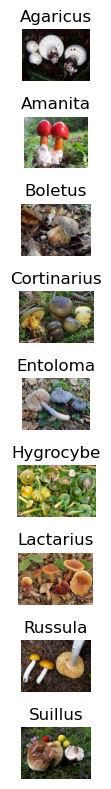

In [16]:
def visualize_sample_images(base_dir):
    class_folders = get_class_folders(base_dir)
    
    plt.figure(figsize=(12, 8))
    
    for i, folder in enumerate(class_folders):
        sample_image = load_sample_image(folder)
        if sample_image:
            plt.subplot(len(class_folders), 1, i + 1)
            plt.imshow(sample_image)
            plt.title(os.path.basename(folder))
            plt.axis('off')
        else:
            print(f'No images found in {folder}')
    
    plt.tight_layout()
    plt.show()

visualize_sample_images(base_dir)


In [17]:
# def calculate_image_stats(base_dir):
#     class_folders = get_class_folders(base_dir)
#     stats = {}
    
#     for folder in class_folders:
#         images = [os.path.join(folder, img) for img in os.listdir(folder) if os.path.isfile(os.path.join(folder, img))]
#         dimensions = []
        
#         for image_path in images:
#             with Image.open(image_path) as img:
#                 dimensions.append(img.size)
        
#         if dimensions:
#             widths, heights = zip(*dimensions)
#             stats[os.path.basename(folder)] = {
#                 'count': len(dimensions),
#                 'min_width': min(widths),
#                 'max_width': max(widths),
#                 'min_height': min(heights),
#                 'max_height': max(heights),
#                 'avg_width': np.mean(widths),
#                 'avg_height': np.mean(heights)
#             }
    
#     return stats

# image_stats = calculate_image_stats(base_dir)
# for class_name, stats in image_stats.items():
#     print(f'Class: {class_name}')
#     print(f"  Count: {stats['count']}")
#     print(f"  Width: Min={stats['min_width']}, Max={stats['max_width']}, Avg={stats['avg_width']:.2f}")
#     print(f"  Height: Min={stats['min_height']}, Max={stats['max_height']}, Avg={stats['avg_height']:.2f}")
#     print()


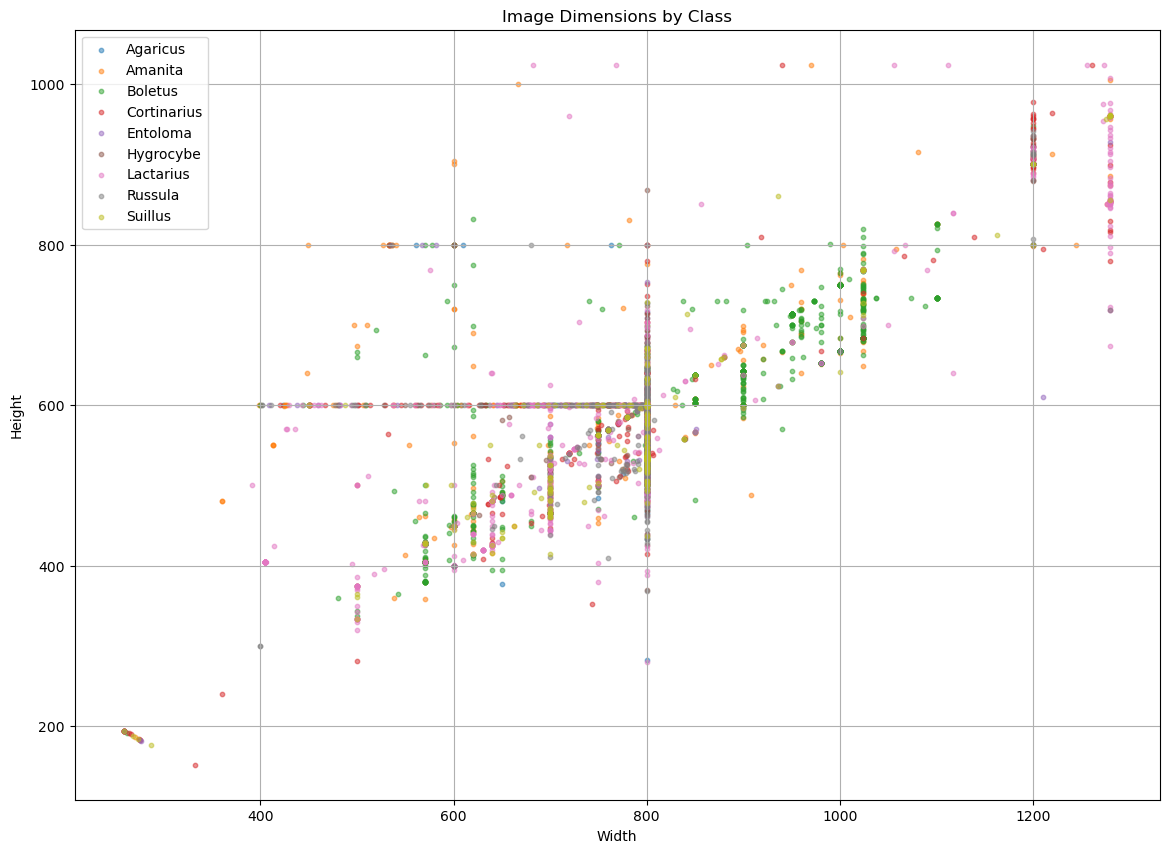

In [79]:
def extract_dimensions_from_folder(folder_path):
    """Extract image dimensions (width, height) from a folder."""
    widths = []
    heights = []
    
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]
    for image_path in images:
        with Image.open(image_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    
    return widths, heights


def plot_image_dimensions(base_dir):
    class_folders = get_class_folders(base_dir)
    
    plt.figure(figsize=(14, 10))
    
    for folder in class_folders:
        class_name = os.path.basename(folder)
        widths, heights = extract_dimensions_from_folder(folder)
        
        if widths and heights:
            plt.scatter(widths, heights, label=class_name, alpha=0.5, s=10)  # Adjust alpha and s for better visibility
    
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Image Dimensions by Class')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_image_dimensions('Archive/Mushrooms')

# Resizing Images

In [8]:
from PIL import Image, ImageOps
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, save_img

def resize_and_pad(image_path, output_path, size=(224, 224), padding_color=(0, 0, 0)):
    """Resize an image to fit within the given size and pad the remaining space."""
    with Image.open(image_path) as img:
        # Resize the image while maintaining aspect ratio
        img.thumbnail(size, Image.LANCZOS)
        
        # Create a new image with the desired size and padding color
        padded_img = Image.new('RGB', size, padding_color)
        
        # Calculate the position to paste the resized image onto the padded image
        paste_position = ((size[0] - img.size[0]) // 2, (size[1] - img.size[1]) // 2)
        
        # Paste the resized image onto the padded image
        padded_img.paste(img, paste_position)
        
        # Save the final image
        padded_img.save(output_path)


In [9]:
def resize_images_in_class_folders(base_dir, output_base_dir, size=(224, 224), padding_color=(0, 0, 0)):
    """Resize images in each class folder and save them to the output directory."""
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    for class_folder in class_folders:
        input_folder = os.path.join(base_dir, class_folder)
        output_folder = os.path.join(output_base_dir, class_folder)
        
        # Create the output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        
        # Process each image in the class folder
        for image_file in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, image_file)
            output_image_path = os.path.join(output_folder, image_file)
            resize_and_pad(input_image_path, output_image_path, size, padding_color)

        print(f'Resized images in class folder: {class_folder}')


In [10]:
def resize_images_in_class_folders(base_dir, output_base_dir, size=(224, 224), padding_color=(0, 0, 0)):
    """Resize images in each class folder and save them to the output directory."""
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    for class_folder in class_folders:
        input_folder = os.path.join(base_dir, class_folder)
        output_folder = os.path.join(output_base_dir, class_folder)
        
        # Create the output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        
        # Process each image in the class folder
        for image_file in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, image_file)
            output_image_path = os.path.join(output_folder, image_file)
            resize_and_pad(input_image_path, output_image_path, size, padding_color)

        print(f'Resized images in class folder: {class_folder}')


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_folder, output_folder, augmentations_per_image=5):
    """Augment images from the input folder and save them to the output folder."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each image in the input folder
    for image_file in os.listdir(input_folder):
        img_path = os.path.join(input_folder, image_file)
        img = load_img(img_path)
        x = img_to_array(img)  # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

        # Generate batches of augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= augmentations_per_image:  # Generate the specified number of augmentations
                break

# Example usage
base_dir = 'Archive/Mushrooms'
output_base_dir = 'Archive/Resized_Mushrooms'

resize_images_in_class_folders(base_dir, output_base_dir)
for class_folder in os.listdir(output_base_dir):
    input_folder = os.path.join(output_base_dir, class_folder)
    output_folder = os.path.join('Archive/Augmented_Mushrooms', class_folder)
    augment_images(input_folder, output_folder)


Resized images in class folder: Agaricus
Resized images in class folder: Amanita
Resized images in class folder: Boletus
Resized images in class folder: Cortinarius
Resized images in class folder: Entoloma
Resized images in class folder: Hygrocybe
Resized images in class folder: Lactarius
Resized images in class folder: Russula
Resized images in class folder: Suillus


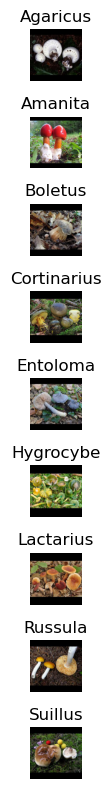

In [20]:
visualize_sample_images('Archive/Resized_Mushrooms')

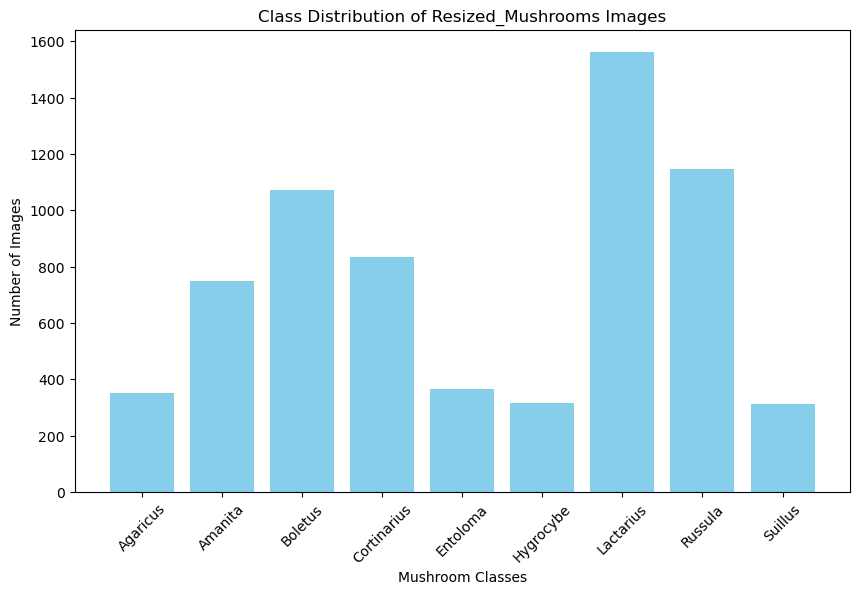

In [24]:
class_distribution = count_images_in_folders('Archive/Resized_Mushrooms')

# Convert the class distribution dictionary to lists for plotting
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Mushroom Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Resized_Mushrooms Images')
plt.xticks(rotation=45)
plt.show()


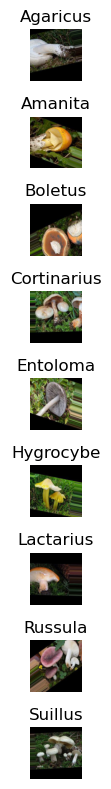

In [21]:
visualize_sample_images('Archive/Augmented_Mushrooms')

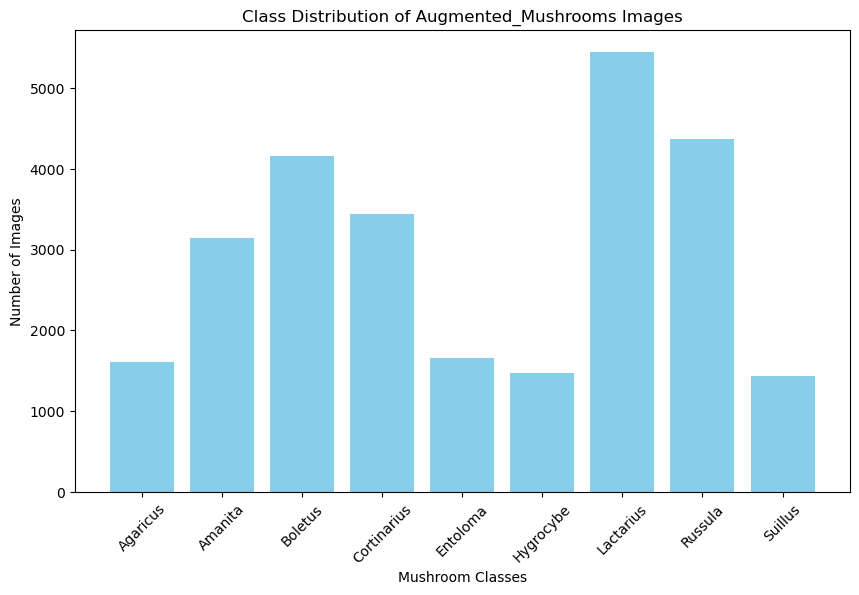

In [25]:
class_distribution = count_images_in_folders('Archive/Augmented_Mushrooms')

# Convert the class distribution dictionary to lists for plotting
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Mushroom Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Augmented_Mushrooms Images')
plt.xticks(rotation=45)
plt.show()


# Data Partition

In [27]:
import os
import shutil
import numpy as np

def create_partition_directories(base_dir, partitions):
    """Create directories for train, validate, and test sets."""
    for partition in partitions:
        partition_dir = os.path.join(base_dir, partition)
        if not os.path.exists(partition_dir):
            os.makedirs(partition_dir)

def get_image_files(class_folder):
    """Get list of image files in the class folder."""
    return [os.path.join(class_folder, f) for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]

def split_data(class_files, num_train, num_val, num_test):
    """Split files into train, validate, and test sets."""
    np.random.shuffle(class_files)
    train_files = class_files[:num_train]
    val_files = class_files[num_train:num_train + num_val]
    test_files = class_files[num_train + num_val:num_train + num_val + num_test]
    return train_files, val_files, test_files

def partition_dataset(base_dir, output_base_dir, num_train, num_val, num_test):
    """Partition the dataset into train, validate, and test sets."""
    partitions = ['train', 'validate', 'test']
    create_partition_directories(output_base_dir, partitions)
    
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    min_class_size = float('inf')
    
    # Determine the size of the smallest class
    for class_folder in class_folders:
        class_folder_path = os.path.join(base_dir, class_folder)
        num_images = len(get_image_files(class_folder_path))
        min_class_size = min(min_class_size, num_images)
    
    # Calculate the number of samples to take for each partition
    num_train_samples = int(min_class_size * num_train)
    num_val_samples = int(min_class_size * num_val)
    num_test_samples = int(min_class_size * num_test)
    
    for class_folder in class_folders:
        class_folder_path = os.path.join(base_dir, class_folder)
        class_files = get_image_files(class_folder_path)
        
        # Ensure balanced class sizes
        if len(class_files) > min_class_size:
            class_files = np.random.choice(class_files, min_class_size, replace=False)
        
        train_files, val_files, test_files = split_data(class_files, num_train_samples, num_val_samples, num_test_samples)
        
        for file_list, partition in zip([train_files, val_files, test_files], partitions):
            partition_folder = os.path.join(output_base_dir, partition, class_folder)
            if not os.path.exists(partition_folder):
                os.makedirs(partition_folder)
            for file in file_list:
                shutil.copy(file, os.path.join(partition_folder, os.path.basename(file)))

# Parameters
base_dir = 'Archive/Augmented_Mushrooms'  # The directory containing the class folders
output_base_dir = 'Archive/Partitioned_Dataset'  # The directory to save train/validate/test sets

# Define the proportions of each set
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure that the ratios sum up to 1
assert (train_ratio + val_ratio + test_ratio) == 1.0, "The sum of train, validate, and test ratios must be 1."

# Partition the dataset
partition_dataset(base_dir, output_base_dir, train_ratio, val_ratio, test_ratio)


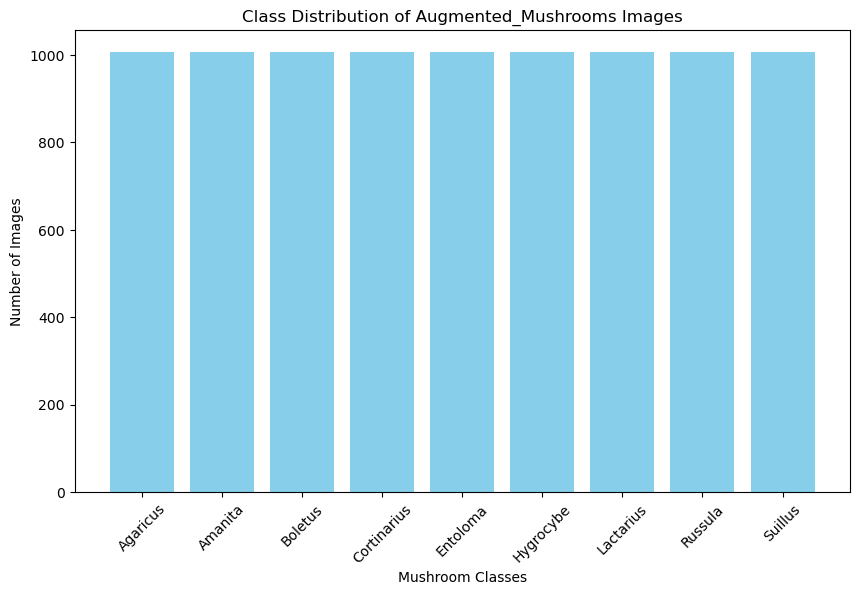

In [29]:
class_distribution = count_images_in_folders('Archive/Partitioned_Dataset/train')

# Convert the class distribution dictionary to lists for plotting
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Mushroom Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Augmented_Mushrooms Images')
plt.xticks(rotation=45)
plt.show()
